# Name:Ayodele Awoleye


# student ID: 8900611
# lab9

In [1]:
pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 23.2
[notice] To update, run: C:\8010 LABSUBMISSION\CSCN8010\venv\pytorch_cpu\Scripts\python.exe -m pip install --upgrade pip


In [2]:
# import all libraries that will be use

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load and preprocess the fMNIST dataset

In [4]:
fashionMnist =tf.keras.datasets.fashion_mnist

In [5]:
print(fashionMnist)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from 'C:\\8010 LABSUBMISSION\\CSCN8010\\venv\\pytorch_cpu\\Lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>


In [6]:
fashionMnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
len(fashionMnist.load_data())
print(fashionMnist.load_data())

((array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ...

In [8]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [9]:
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('\n\nTest Data:')
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')

print('\n\nImage Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Train Data:
Images: (60000, 28, 28)
Labels: (60000,)


Test Data:
Images: (10000, 28, 28)
Labels: (10000,)


Image Data Range:
Min: 0
Max: 255


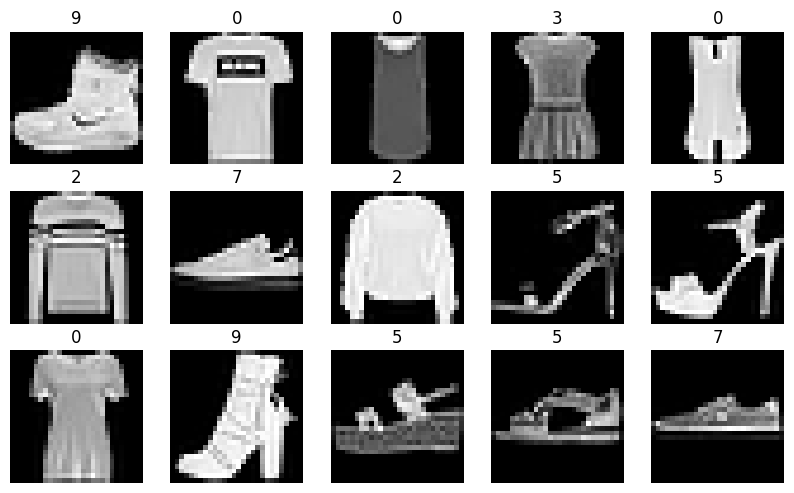

In [10]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(train_labels[i])
    plt.axis('off')
plt.show()

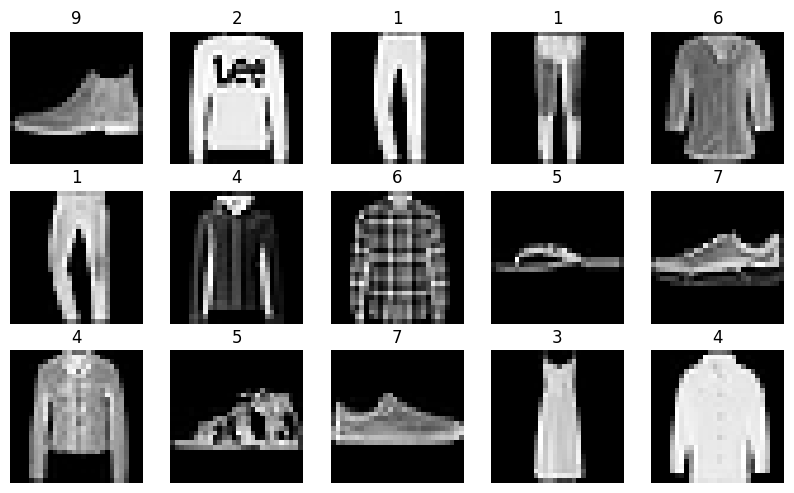

In [11]:
plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(5, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(test_labels[i])
    plt.axis('off')
plt.show()

Question 2.Train a dense neural network using Keras

In [12]:
# let train the data

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# ecoding the label

In [14]:
num_classes = 10
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [15]:
# lets Build the dense neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  
    Dense(128, activation='relu'),    
    Dense(64, activation='relu'),      
    Dense(num_classes, activation='softmax')  
])

# Compile the model

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
batch_size = 128
epochs = 10
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1) 

Epoch 1/10
422/422 [==============================] - 4s 7ms/step - loss: 0.5541 - accuracy: 0.8081 - val_loss: 0.4331 - val_accuracy: 0.8487
Epoch 2/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3987 - accuracy: 0.8594 - val_loss: 0.4008 - val_accuracy: 0.8602
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3568 - accuracy: 0.8712 - val_loss: 0.3633 - val_accuracy: 0.8665
Epoch 4/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3291 - accuracy: 0.8815 - val_loss: 0.3696 - val_accuracy: 0.8645
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.3142 - accuracy: 0.8840 - val_loss: 0.3318 - val_accuracy: 0.8815
Epoch 6/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2921 - accuracy: 0.8933 - val_loss: 0.3369 - val_accuracy: 0.8767
Epoch 7/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2790 - accuracy: 0.8984 - val_loss: 0.3331 - val_accuracy: 0.8823
Epoch 

Question 3:Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration (2 points)

In [18]:
# lets Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f" The Test accuracy is approximately: {test_accuracy * 100:.2f}%")

313/313 [==============================] - 1s 3ms/step - loss: 0.3453 - accuracy: 0.8776
 The Test accuracy is approximately: 87.76%


In [19]:
# Generate predictions for the test set
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(test_labels, axis=1)
print(predicted_labels)

313/313 [==============================] - 1s 2ms/step
[9 2 1 ... 8 1 5]


In [20]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

In [21]:
# Visualization of  the confusion matrix

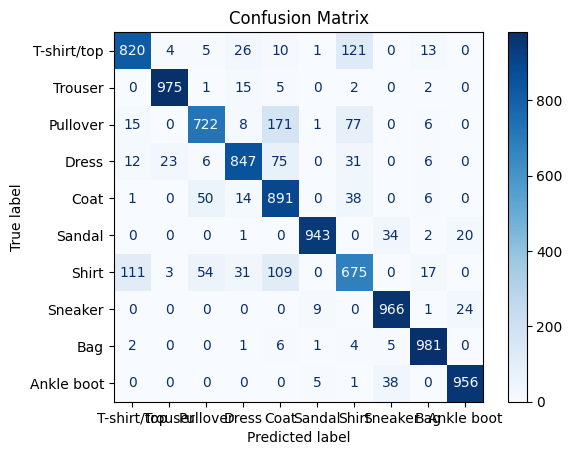

In [22]:

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classes)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix breaks down the model's predictions for each class in the fMNIST dataset.
The true classes are represented by rows, while the predicted classes are represented by columns.
Off-diagonal elements represent misclassifications, while diagonal elements represent correct classifications (true positives).

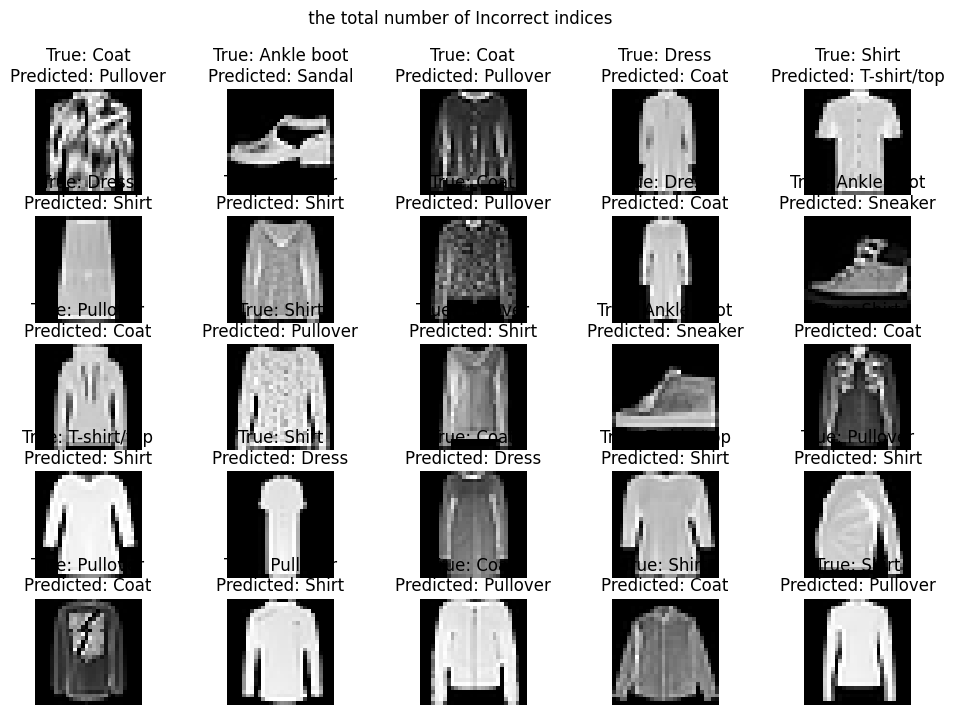

In [23]:
incorrect_indices = np.where(predicted_labels != true_labels)[0]

plt.figure(figsize=(12, 8))
for i, idx in enumerate(incorrect_indices[:25]):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[idx], cmap='gray')
    plt.title(f"True: {classes[true_labels[idx]]}\nPredicted: {classes[predicted_labels[idx]]}")
    plt.axis('off')
plt.suptitle(' the total number of Incorrect indices')
plt.show()